In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout
from tensorflow.keras import utils
from keras.utils import to_categorical


Using TensorFlow backend.


In [3]:
from livelossplot import PlotLossesKeras

In [4]:
pixel_rows , pixel_cols = 28, 28 #sizing to greyscale as given
number_classes = 10
def data(raw):
    new_y = keras.utils.to_categorical(raw.label, number_classes)
    number_image = raw.shape[0]
    array_x = raw.values[:, 1:] #leaving the first coloumn and taking all the other 
    shaped_array_x = array_x.reshape(number_image, pixel_rows, pixel_cols, 1)
    new_x = shaped_array_x / 255 #as all the 
    return new_x, new_y
    

In [5]:
df = 'fashion-mnist_train.csv'
raw_df = pd.read_csv(df)

In [16]:
df_test = 'fashion-mnist_test.csv'
raw_df_test = pd.read_csv(df_test)

In [17]:
X_test, y_test = data(raw_df_test)

In [6]:
X, Y = data(raw_df)

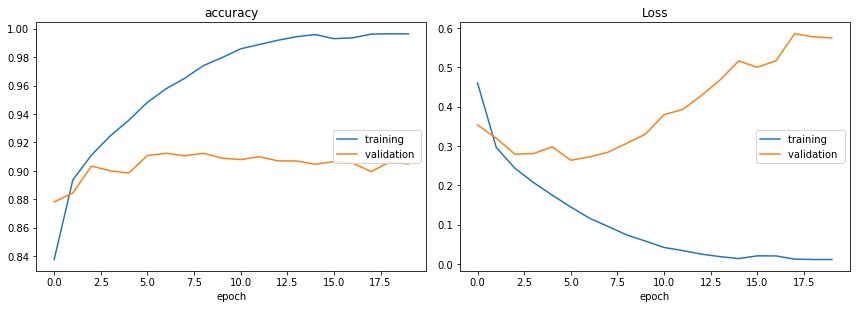

accuracy
	training         	 (min:    0.838, max:    0.996, cur:    0.996)
	validation       	 (min:    0.878, max:    0.912, cur:    0.905)
Loss
	training         	 (min:    0.011, max:    0.460, cur:    0.011)
	validation       	 (min:    0.264, max:    0.585, cur:    0.574)
48000/48000 [==============================] - 88s 2ms/sample - loss: 0.0112 - accuracy: 0.9964 - val_loss: 0.5742 - val_accuracy: 0.9048


In [7]:
model = Sequential()
model.add(Conv2D(20, kernel_size=(3,3), activation = 'relu', input_shape = (pixel_rows, pixel_cols, 1)))
model.add(Conv2D(20, kernel_size=(3,3), activation ='relu'))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dense(number_classes, activation = 'softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer= 'adam', metrics= ['accuracy'])
history = model.fit(X,Y, batch_size = 128, epochs= 20, callbacks=[PlotLossesKeras()], verbose=1, validation_split= 0.20)

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 20)        200       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 20)        3620      
_________________________________________________________________
flatten (Flatten)            (None, 11520)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1474688   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,479,798
Trainable params: 1,479,798
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
score = model.evaluate(X, Y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12033184859213167
Test accuracy: 0.97936666


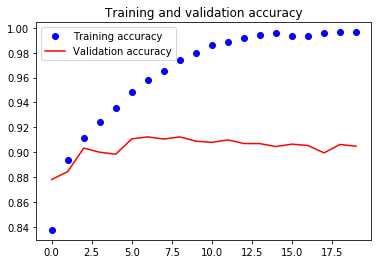

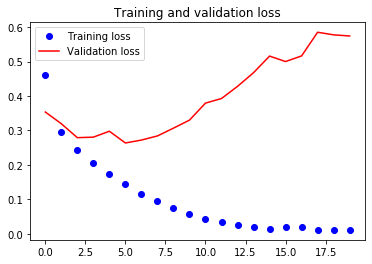

In [13]:
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
import numpy as np
prediction_classes = model.predict_classes(X_test)
Y_true = raw_df_test.iloc[:, 0]


In [29]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(number_classes)]
print(classification_report(Y_true, prediction_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.86      0.87      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.89      0.84      0.87      1000
     Class 3       0.93      0.91      0.92      1000
     Class 4       0.86      0.90      0.88      1000
     Class 5       0.96      0.97      0.97      1000
     Class 6       0.75      0.79      0.77      1000
     Class 7       0.96      0.95      0.95      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

